# DATA SCIENCE PROJECT

# Project: Stock Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
google_stock_data = pd.read_csv('GOOG.csv')
google_stock_data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [3]:
google_stock_data.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [4]:
google_stock_data = google_stock_data[['date','open','close']]
google_stock_data['date'] = pd.to_datetime(google_stock_data['date'].apply(lambda x: x.split()[0])) 
google_stock_data.set_index('date',drop=True,inplace=True)
google_stock_data.head()

,open,close
date,,
2016-06-14,716.48,718.27
2016-06-15,719.00,718.92
2016-06-16,714.91,710.36
2016-06-17,708.65,691.72
2016-06-20,698.77,693.71


C:\Users\Esraa Alsaede\AppData\Local\Temp\ipykernel_9140\1423386875.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fg.show()


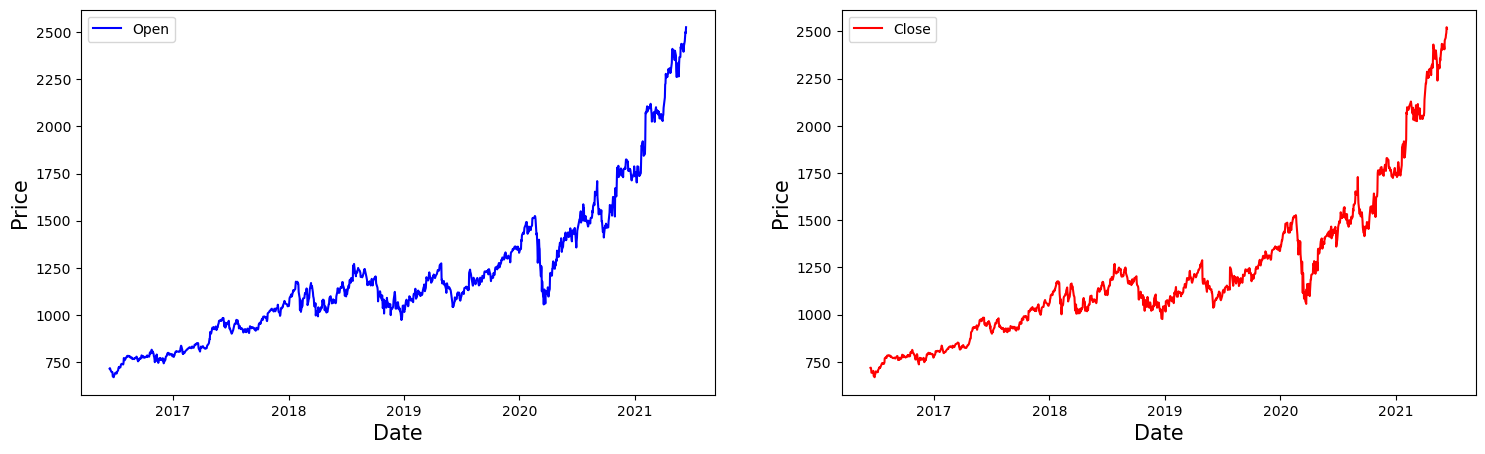

In [5]:
fg, ax =plt.subplots(1,2,figsize=(18,5))
ax[0].plot(google_stock_data['open'],label='Open',color='blue')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(google_stock_data['close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fg.show()

# Data Preprocessing

In [6]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
google_stock_data[google_stock_data.columns] = MMS.fit_transform(google_stock_data)

In [7]:
training_size = round(len(google_stock_data) * 0.80)

In [8]:
train_data = google_stock_data[:training_size]
test_data  = google_stock_data[training_size:]

In [9]:
def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)):
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [10]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [11]:
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((956, 50, 2), (956, 2), (202, 50, 2), (202, 2))

# LSTM model

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [13]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.2)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
30/30 [==============================] - 7s 78ms/step - loss: 0.0081 - mean_absolute_error: 0.0630 - val_loss: 0.0201 - val_mean_absolute_error: 0.1208
Epoch 2/100
30/30 [==============================] - 1s 47ms/step - loss: 9.2293e-04 - mean_absolute_error: 0.0238 - val_loss: 0.0082 - val_mean_absolute_error: 0.0755
Epoch 3/100
30/30 [==============================] - 1s 43ms/step - loss: 5.9865e-04 - mean_absolute_error: 0.0173 - val_loss: 0.0034 - val_mean_absolute_error: 0.0466
Epoch 4/100
30/30 [==============================] - 1s 44ms/step - loss: 5.5967e-04 - mean_absolute_error: 0.0169 - val_loss: 0.0039 - val_mean_absolute_error: 0.0497
Epoch 5/100
30/30 [==============================] - 2s 52ms/step - loss: 5.8008e-04 - mean_absolute_error: 0.0176 - val_loss: 0.0033 - val_mean_absolute_error: 0.0453
Epoch 6/100
30/30 [==============================] - 2s 62ms/step - loss: 5.4862e-04 - mean_absolute_error: 0.0167 - val_loss: 0.0050 - val_mean_absolute_error: 0.0

30/30 [==============================] - 2s 53ms/step - loss: 1.9088e-04 - mean_absolute_error: 0.0101 - val_loss: 0.0041 - val_mean_absolute_error: 0.0536
Epoch 50/100
30/30 [==============================] - 2s 56ms/step - loss: 2.0550e-04 - mean_absolute_error: 0.0104 - val_loss: 0.0051 - val_mean_absolute_error: 0.0608
Epoch 51/100
30/30 [==============================] - 2s 55ms/step - loss: 2.0482e-04 - mean_absolute_error: 0.0105 - val_loss: 0.0048 - val_mean_absolute_error: 0.0593
Epoch 52/100
30/30 [==============================] - 2s 54ms/step - loss: 1.8752e-04 - mean_absolute_error: 0.0099 - val_loss: 0.0035 - val_mean_absolute_error: 0.0489
Epoch 53/100
30/30 [==============================] - 2s 54ms/step - loss: 1.8744e-04 - mean_absolute_error: 0.0101 - val_loss: 0.0027 - val_mean_absolute_error: 0.0417
Epoch 54/100
30/30 [==============================] - 2s 54ms/step - loss: 1.8405e-04 - mean_absolute_error: 0.0099 - val_loss: 0.0019 - val_mean_absolute_error: 0.0339

30/30 [==============================] - 2s 62ms/step - loss: 1.2973e-04 - mean_absolute_error: 0.0081 - val_loss: 0.0024 - val_mean_absolute_error: 0.0401
Epoch 98/100
30/30 [==============================] - 2s 61ms/step - loss: 1.2830e-04 - mean_absolute_error: 0.0081 - val_loss: 0.0019 - val_mean_absolute_error: 0.0350
Epoch 99/100
30/30 [==============================] - 2s 57ms/step - loss: 1.2204e-04 - mean_absolute_error: 0.0080 - val_loss: 0.0010 - val_mean_absolute_error: 0.0247
Epoch 100/100
30/30 [==============================] - 2s 70ms/step - loss: 1.2062e-04 - mean_absolute_error: 0.0078 - val_loss: 0.0017 - val_mean_absolute_error: 0.0331


In [15]:
test_predicted = model.predict(test_seq)
test_predicted[:3]

7/7 [==============================] - 1s 16ms/step


array([[0.48214704, 0.48101267],
       [0.48878562, 0.4874867 ],
       [0.49459   , 0.49313572]], dtype=float32)

In [16]:
test_inverse_predicted = MMS.inverse_transform(test_predicted) # Inversing scaling on predicted data
test_inverse_predicted[:3]

array([[1564.862 , 1559.74  ],
       [1577.1694, 1571.7385],
       [1587.9303, 1582.2081]], dtype=float32)

# Visualizing predicted and actual data

In [17]:
# Merging actual and predicted data for better visualization
gs_slic_data = pd.concat([google_stock_data.iloc[-202:].copy(),pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],index=google_stock_data.iloc[-202:].index)], axis=1)

In [18]:
gs_slic_data[['open','close']] = MMS.inverse_transform(gs_slic_data[['open','close']]) # Inverse scaling

In [19]:
gs_slic_data.head()

,open,close,open_predicted,close_predicted
date,,,,
2020-08-24,1593.98,1588.20,1564.862061,1559.739990
2020-08-25,1582.07,1608.22,1577.169434,1571.738525
2020-08-26,1608.00,1652.38,1587.930298,1582.208130
2020-08-27,1653.68,1634.33,1621.366943,1615.259399
2020-08-28,1633.49,1644.41,1638.136597,1631.481201


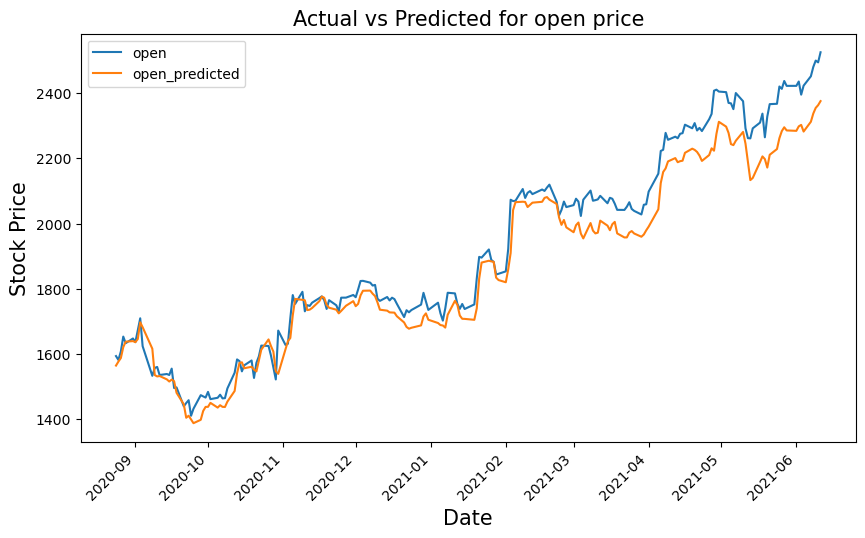

In [20]:
gs_slic_data[['open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

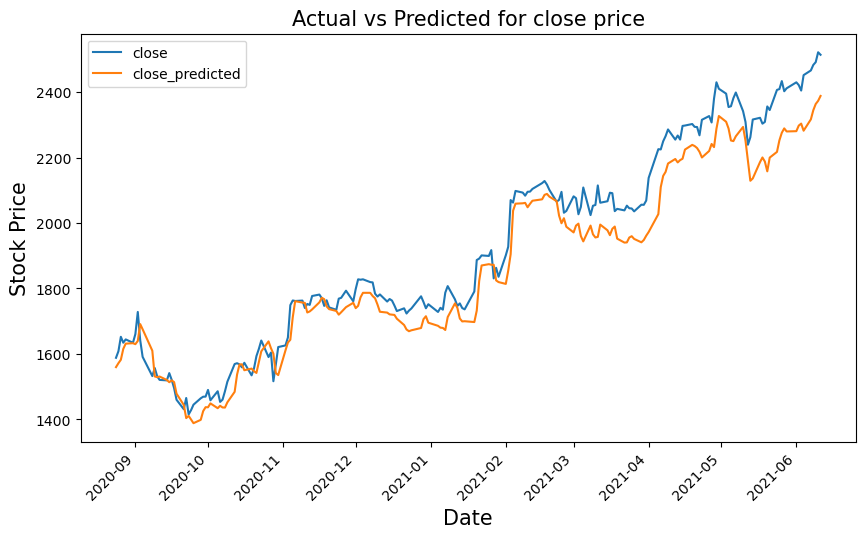

In [21]:
gs_slic_data[['close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()